In [49]:
filename = "data.csv"
units  = r"нм"

xlabel = '$\lambda,$~нм'
ylabel = r'$\sin \varphi$'

In [30]:
import numpy as np
import pandas as pd
import sympy as sp
import statsmodels.api as sm
import math


# Load data
data = pd.read_csv(filename, engine='python', sep = ',', header=None)

In [31]:
data

,0,1,2,3
0,404.7,0.2016,404.7,-0.2024
1,435.8,0.2173,435.8,-0.2172
2,491.6,0.2451,491.6,-0.2456
3,546.1,0.2722,546.1,-0.2731
4,577.0,0.2875,577.0,-0.2882
5,579.1,0.2890,579.1,-0.2893


In [7]:
# Exract arrays
#first line
y = np.array(data[1])
t = np.array(data[0])

#second line
y1 = np.array(data[3])
t1 = np.array(data[2])

#remove nan from array
y1 = y1[~np.isnan(y1)]
t1 = t1[~np.isnan(t1)]

t = sm.add_constant(t, prepend=False)
t1 = sm.add_constant(t1, prepend=False)

In [8]:
# Fitting first line
model = sm.OLS(y,t)
result = model.fit()

# Saving parameters
s_err, i_err = result.bse
s, i = result.params

In [9]:
# Fitting second line
model1 = sm.OLS(y1,t1)
result1 = model1.fit()

# Saving parameters
s_err1, i_err1 = result1.bse
s1, i1 = result1.params

In [10]:
result.summary().tables[1]

/Users/ri/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


,coef,std err,t,P>|t|,[0.025,0.975]
x1,0.0005,1.07e-06,467.927,0.000,0.000,0.001
const,-0.0004,0.001,-0.739,0.501,-0.002,0.001


In [11]:
result1.summary().tables[1]

/Users/ri/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


,coef,std err,t,P>|t|,[0.025,0.975]
x1,-0.0005,1.86e-06,-268.369,0.000,-0.001,-0.000
const,0.0004,0.001,0.411,0.702,-0.002,0.003


In [50]:
import matplotlib.pylab as plt
from matplotlib import rc
from matplotlib.ticker import AutoMinorLocator
# Plot size
plt.rcParams['figure.figsize'] = (8, 5)

rc('text.latex', preamble=r"\usepackage[utf8]{inputenc}")
rc('text.latex', preamble=r"\usepackage[russian]{babel}")
rc('text.latex', preamble=r"\usepackage{lmodern}")
rc('text.latex', preamble=r"\usepackage[T2A]{fontenc}")
rc('text.latex', unicode=True)

# Options
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'lmodern',
          'text.latex.unicode': True,
          }

plt.rcParams.update(params)
fig, ax = plt.subplots()

minor_locator_y = AutoMinorLocator(4)
minor_locator_x = AutoMinorLocator(2)
ax.yaxis.set_minor_locator(minor_locator_y)
ax.xaxis.set_minor_locator(minor_locator_x)

#ax.yaxis.set_ticks(np.arange(0, 1, 0.2))

#first line
pos, = plt.plot(data[0],data[1],'bo')
plt.plot(np.arange(400, 650, 50), np.arange(400, 650, 50)*s+i,'k--')

#second line
neg, = plt.plot(data[2], data[3], 'ro')
plt.plot(np.arange(400, 650, 50), np.arange(400, 650, 50)*s1+i1, 'k--')

plt.legend([pos, neg], ['1 порядок', '-1 порядок'], loc = 2)

plt.xlabel(xlabel)
plt.ylabel(ylabel)


label = r"$k=(" + "{:.3f}".format(s1) + r"\pm" + "{:.3f}".format(s_err1) + ")$ " + units
label2 = r"$k=(" + "{:.3f}".format(s) + r"\pm" + "{:.3f}".format(s_err) + ")$ " + units
#ax.text(0.05, 0.9, label, transform=ax.transAxes, bbox={'facecolor':'white', 'edgecolor':'black', 'pad':10})

ax.grid(color='g', linestyle='--', linewidth=0.6)
ax.grid(color='g', linestyle='--', linewidth=0.1, which = 'minor' )

res = plt.gcf()

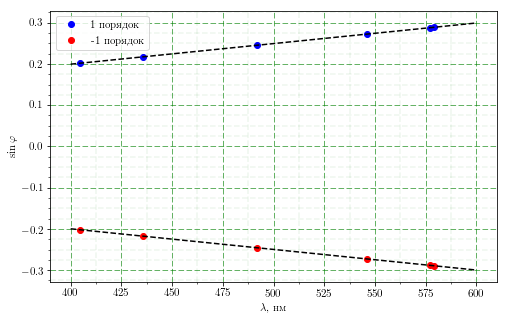

In [51]:
plt.show()

In [52]:
# Save file
res.savefig("graph1.pdf", 
            dpi=1000, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
            )